In [2]:
#used for manipulating directory paths
import os

#scientific and vector computation in python
import numpy as np

#Plotting library
from matplotlib import pyplot
#to plot 3D plots
from mpl_toolkits.mplot3d import Axes3D

# for scientifice computing
from scipy import optimize

#tells matplotlib to include graphs within the notebook
%matplotlib inline

# to read csv files
import pandas as pd

data = pd.read_csv(os.path.join("data","advertising.csv"))
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [29]:
data_X = np.stack((np.ones(1000),data.iloc[:1000,3],data.iloc[:1000,0],data.iloc[:1000,1],data.iloc[:1000,2],data.iloc[:1000,6]))
data_X = data_X.T
data_Y = (data.iloc[:1000,9])
X = data_X[:600,:]
Y = data_Y[:600]
'''X = m X 2 array where X[1] = daily internet usage and X[2] = daily time spent on site X[3] = age
X[4] = area income
Y = if clicked on add or not
'''
print(X.shape)
print(Y.shape)

(600, 6)
(600,)


In [4]:
def plotData(X1,X2,Y):
    pos = Y==1
    neg = Y==0

    pyplot.plot(X1[pos],X2[pos],"r+")
    pyplot.plot(X1[neg],X2[neg],"bx")

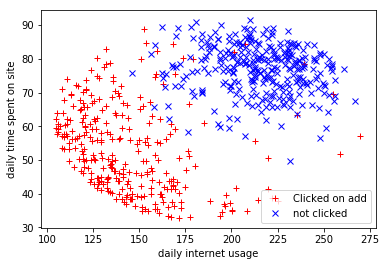

In [5]:
plotData(X[:,1],X[:,2],Y)
pyplot.xlabel("daily internet usage")
pyplot.ylabel("daily time spent on site")
pyplot.legend(['Clicked on add','not clicked'])

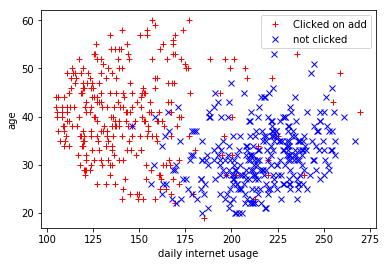

In [28]:
plotData(X[:,1],X[:,3],Y)
pyplot.xlabel("daily internet usage")
pyplot.ylabel("age")
pyplot.legend(['Clicked on add','not clicked'])

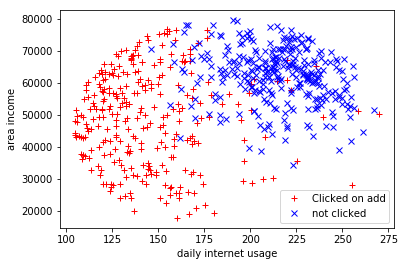

In [29]:
plotData(X[:,1],X[:,4],Y)
pyplot.xlabel("daily internet usage")
pyplot.ylabel("area income")
pyplot.legend(['Clicked on add','not clicked'])

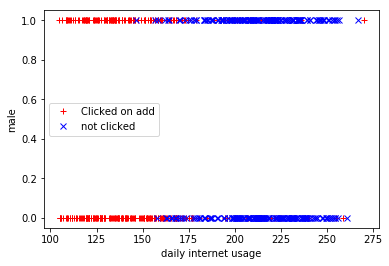

In [30]:
plotData(X[:,1],X[:,5],Y)
pyplot.xlabel("daily internet usage")
pyplot.ylabel("male")
pyplot.legend(['Clicked on add','not clicked'])

In [6]:
def sigmoid(z):
    sigm = 1+ np.exp(-z)
    sigm = 1/sigm
    return sigm

In [7]:
def costFunction(theta,X,y):
    J = 0.0
    m = Y.size
    J = -1/m * np.sum(((1-y)*np.log(1-sigmoid(np.dot(X,theta))))+((y)*np.log(sigmoid(np.dot(X,theta)))))
    grad = 1/m*np.dot(X.T,(sigmoid(np.dot(X,theta))-y))
    return J, grad

In [8]:
print(X[:,:3].shape)
J,grad = costFunction(np.array([0,0,0]),X[:,:3],Y)
print(J)
print( grad)

(600, 3)
0.6931471805599453
[1.00000000e-02 1.92557917e+01 6.50868333e+00]


In [9]:
options = {'maxiter' : 400}
initial_theta = np.zeros(3)
x = X[:,:3]
#print(x.shape)
y = Y[:]
#print(y.shape)
#res = optimize.minimize(computeCost,initial_theta,(X[:,:3],Y),jac = True,method = 'TNC',options = options)
res = optimize.minimize(costFunction,
                        initial_theta,
                        (x, y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
Theta = res.x
print(cost)
print(Theta)

0.1388938998348189
[22.65697443 -0.06669381 -0.15864907]


In [12]:
def gradientDescent(X,Y,theta,alpha,num_iters):
    '''num_iters = number of iterations
        alpha = learning rate
        J_history = value of cost function at each iterations
    '''
    m = Y.size
    J_history = []
    
    for i in range(num_iters):
        theta = theta - (alpha/m)*np.dot(X.T,sigmoid(np.dot(X,theta))-Y)
        J_history.append(costFunction(theta,X,Y)[0])
    return theta, J_history

In [14]:
num_iters = 4000;
initial_theta1 = np.zeros(x.shape[1])
theta, J_history = gradientDescent(x,y,initial_theta1,0.00021,num_iters)
#print(theta)
print(costFunction(theta,x,y)[0])
#Fprint(J_history)

0.6640633598269415


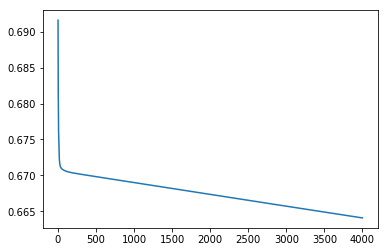

In [15]:
pyplot.plot(np.arange(1,num_iters+1),J_history)

<p> The above Learning curve shows that gradient descent requires more than 4000 iterations to converge </p>

0.1388938998348189


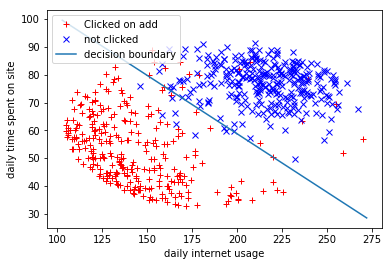

In [16]:
pos = Y==1
neg = Y==0

pyplot.plot(X[pos,1],X[pos,2],"r+")
pyplot.plot(X[neg,1],X[neg,2],"bx")
pyplot.xlabel("daily internet usage")
pyplot.ylabel("daily time spent on site")
 # Only need 2 points to define a line, so choose two endpoints
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
plot_y = (-1. / Theta[2]) * (Theta[1] * plot_x + Theta[0])

        # Plot, and adjust axes for better viewing
pyplot.plot(plot_x, plot_y)
pyplot.legend(['Clicked on add','not clicked','decision boundary'])
print(costFunction(Theta,x,y)[0])

<p> The blue line shows the decision boundary for the curve, although I have written the code for gradient descent but it will require like 10,0000 iterations to minimize the cost function, therefore I have used optimize.minimize() instead.<br/>
here the cost comes out to be 0.1564... which is much less than 0.668823134... i.e. the cost while using gradient descent.
</p>

In [17]:
def mapFeatures(X1,X2):
    Xtmp = np.ones((X1.shape[0],6))
    for i in range(5):
        for j in range(3):
            Xtmp[:,i+1] = (X1 ** j) * (X2 ** (2-j))
    return Xtmp
    

In [18]:
#print(X[:10,:])
X_t = mapFeatures(X[:,1],X[:,2])
#print(X_t[:10,:])
initial_theta = np.zeros(6)
options = {'maxiter' : 400}
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_t, y),
                        jac=True,
                        method='TNC',
                        options=options)
Theta = res.x
print(Theta)
cost = res.fun
print(cost)
#Theta_grad,J_history = gradientDescent(X,y,initial_theta,0.01,500)
#print(Theta)

[ 6.64012143e+00 -4.02443188e-05 -4.02443188e-05 -4.02443188e-05
 -4.02443188e-05 -4.02443188e-05]
0.2789361102383274


In [19]:
initial_theta = np.zeros(6)
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
theta_2 = res.x
print(theta_2)
cost = res.fun
print(cost)

[ 4.10466725e+01 -8.76250175e-02 -2.75723486e-01  2.06027671e-01
 -2.07958461e-04 -1.23910051e+00]
0.05406540258904272


/home/deepti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [30]:
x_test = data_X[600:1000,:]
y_test = data_Y[600:1000]
print(x_test.shape)

(400, 6)


In [31]:
def predict(X,theta):
    Z = np.zeros(x_test.shape[0])
    Z = (np.dot(X,theta) >=0)
    return Z

In [45]:
Z = predict(x_test,theta_2)


In [41]:
def accuracy(X,Y):
    accu = 1/(X.size) * np.sum(X==Y)
    return accu*100

In [44]:
accu = accuracy(Z,y_test)
print("accuracy is %3f" %accu)

accuracy is 95.750000
